TODO:
- Plot contour diagram
- Calcuate with SykitLearn

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, mpl_toolkits

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
mpl_toolkits The 'mpl_toolkits' distribution was not found and is required by the application
Mon Jan 30 22:33:18 2017 EET

# Linear Regression (univariable)
Predicting profit of sale point based of city population.

### Import libraries

In [3]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Load data

In [4]:
data = pd.read_csv("./data/house-price(area).txt", names=['area', 'price'], header=None)

In [5]:
data.shape

(97, 2)

In [6]:
data.head(5)

,area,price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.tail(5)

,area,price
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [8]:
data.isnull().values.any()

False

### Initial data

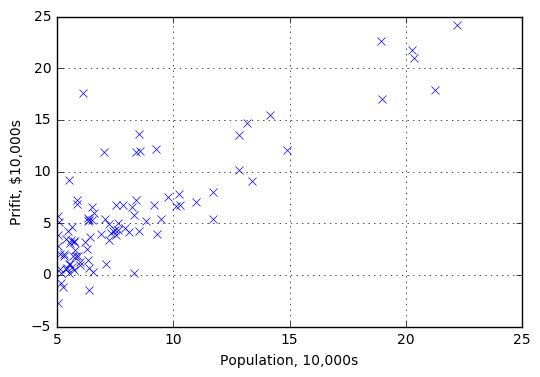

In [9]:
plt.plot(data['area'], data['price'], 'x')
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)

### Gradient descent
Add '1' column for x0 feature

In [10]:
data['x0'] = 1

In [11]:
data.tail(4)

,area,price,x0
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1
96,5.4369,0.61705,1


### Cost function

In [12]:
def cost(X, y, theta):
    m = len(y)
    J = 0
    for i in range(0, m):
        J = J + (np.dot(theta, X[i][np.newaxis].T) - y[i])**2;
    J = J / (2 * m);
    return float(J)

In [13]:
cost(data[['x0', 'area']].values, data['price'].values, [0, 0])

32.072733877455654

### Gradient descent

In [14]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    t_history = []
    number_of_features = len(theta)

    for iter in range(1, num_iters):
        temp = [0] * number_of_features

        for i in range(0, number_of_features):
            s = 0
            for j in range (0, m):
                s = s + (np.dot(X[j], theta) - y[j]) * X[j, i]
            temp[i] = theta[i] - alpha * s / m

        theta = temp
        t_history.append(temp)
        J_history.append(cost(X, y, theta))

    return theta, J_history, t_history

In [15]:
t, J_h, t_h  = gradientDescent(data[['x0', 'area']].values, data['price'].values, [0, 0], 0.01, 1500)

#### Cost value with iterations

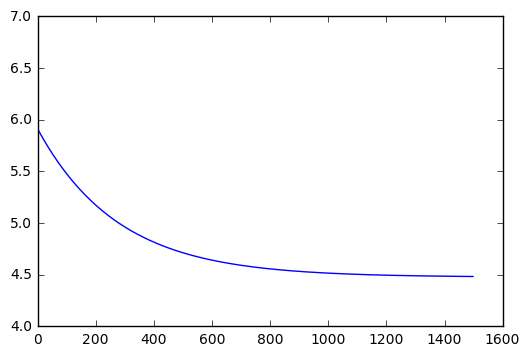

In [47]:
plt.plot(np.arange(0, 1499), J_h, '-', linewidth=1)
plt.show()

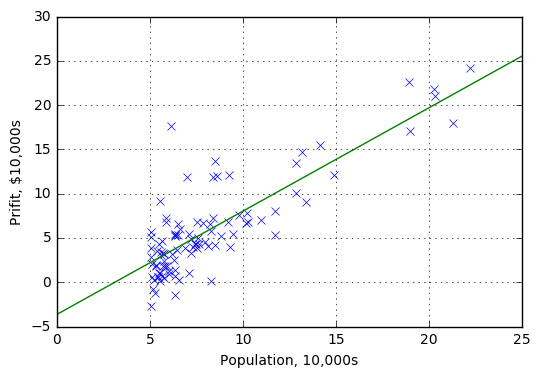

In [17]:
def lin_reg_model(x):
    return t[0] + x * t[1]

line_segment = np.linspace(0, 25, 1000)
plt.plot(data['area'], data['price'], 'x')
plt.plot(line_segment, lin_reg_model(line_segment))
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)

#### Prediction

In [18]:
print('For a city with population of 35K people, the profit will be: {:.2f}$'.format((t[0] + t[1] * 3.5) * 10000))
print('For a city with population of 35K people, the profit will be: {:.2f}$'.format((t[0] + t[1] * 7) * 10000))

For a city with population of 35K people, the profit will be: 4522.88$
For a city with population of 35K people, the profit will be: 45343.87$


#### Visualisations

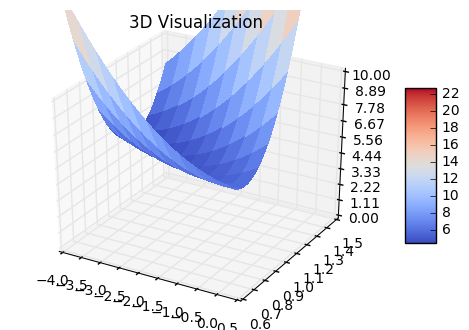

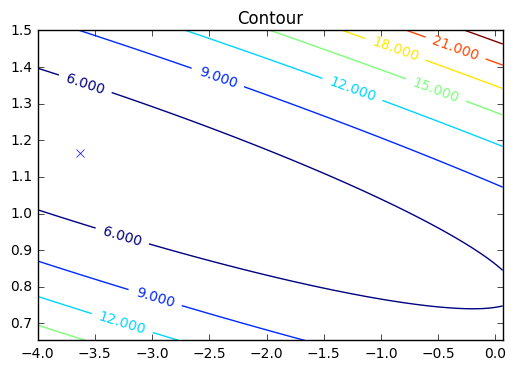

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

t1 = np.linspace(-4, 0.0628917527104, 100)
t2 = np.linspace(0.653288497456, 1.5, 100)
t1, t2 = np.meshgrid(t1, t2)
z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        tmp = [t1[i, j], t2[i,j]]
        z[i, j] = cost(data[['x0', 'area']].values, data['price'].values, tmp)

# Plot the surface.
surf = ax.plot_surface(t1, t2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title('3D Visualization')

print('\n')
print('\n')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.figure()
CS = plt.contour(t1, t2, z)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(t[0], t[1], 'x')
plt.title('Contour')

plt.show()


# --------------- TODO --------------

### Spliting data into training and test data

70% for train and 30% for test

In [21]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['x0', 'area'];
predicted_class_names = ['price'];

X = data[feature_col_names].values
y = data[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) # 42 is the answer for everything

In [22]:
print("{0:2.2f}% in traning set".format((len(X_train) / len(data.index)) * 100))
print("{0:0.2f}% in testing set".format((len(X_test) / len(data.index)) * 100))

69.07% in traning set
30.93% in testing set


### Post-split data preparation

Hidden missing values (zeros)

In [23]:
print("# rows in dataframe: {0}".format(len(data)))
print("# rows missing area: {0}".format(len(data.loc[data['area'] == 0])))

# rows in dataframe: 97
# rows missing area: 0


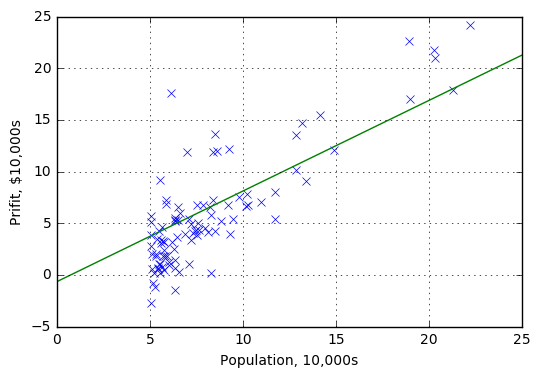

In [24]:
def lin_reg_model(x):
    return -0.6539 + x * 0.87678

line_segment = np.linspace(0, 25, 1000)
plt.plot(data['area'], data['price'], 'x')
plt.plot(line_segment, lin_reg_model(line_segment))
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)

### Prediction

In [25]:
y_test[1, 0]

0.55657000000000001

In [26]:
def calcAccuracy(X, y, theta):
    m = len(X)
    s = 0
    for i in range(0, m):
        s = s + (np.dot(X[i], theta) - y[i, 0])**2
    s = s / m
    return s

In [27]:
print('Accuracy is {:.2f}'.format(calcAccuracy(X_test, y_test, t)))

Accuracy is 10.54


### Cross Validation

In [28]:
def logisticRegressionCV(X, y, chunks_count):
    m = len(X)
    chunk_size = m // chunks_count
    for i in range(0, chunks_count):
        theta = [0, 0]
        print(i)
        test_start_index = i * chunk_size
        test_end_index = (i + 1) * chunk_size
        print(test_start_index)
        print(test_end_index)
        test_chunk_X = X[test_start_index:test_end_index]
        train_cunk_X = np.concatenate((X[:test_start_index], X[test_end_index:]), axis=0)
        test_chunk_y = y[test_start_index:test_end_index]
        train_cunk_y = np.concatenate((y[:test_start_index], y[test_end_index:]), axis=0)
        
        t, h = gradientDescent(train_cunk_X, train_cunk_y, theta, 0.001, 1000)
        
        print('theta {}: {}'.format(i, t))
        
        print('Accuracy is {:.2f}'.format(calcAccuracy(test_chunk_X, test_chunk_y, t)))

In [29]:
logisticRegressionCV(X, y, 5)

0
0
19


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
def lin_reg_model(x):
    return -0.5791 + x * 0.8981

line_segment = np.linspace(0, 25, 1000)
plt.plot(data['area'], data['price'], 'x')
plt.plot(line_segment, lin_reg_model(line_segment))
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)